In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from typing import List

## Class Declaration

### Error Function Class
This class sets the error function and its derivative based on the given `error_type` parameter. The error function is used to calculate the error of the neural network. The error function is defined as:

- **Mean Squared Error (MSE)**: The mean squared error is the average of the squared differences between the predicted and actual values. It is defined as: $$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y}_{i})^2$$ and its derivative is: $$\frac{\partial MSE}{\partial y} = \frac{2}{n} * \sum_{i=1}^{n} (y_{i} - \hat{y}_{i})$$

- **Mean Absolute Error (MAE)**: The mean absolute error is the average of the absolute differences between the predicted and actual values. It is defined as: $$MAE = \frac{1}{n} \sum_{i=1}^{n} |y_{i} - \hat{y}_{i}|$$ and its derivative is: $$\frac{\partial MAE}{\partial y} = \frac{1}{n} * \sum_{i=1}^{n} sign(y_{i} - \hat{y}_{i})$$

In [18]:
class ErrorFunction:
  def __init__(self, error_type:str = 'mse'):
    self.set_error_function(error_type)

  def set_error_function(self, error_type:str):
    if error_type == 'mse':
      self.func = self.mse
      self.dfunc = self.d_mse
    elif error_type == 'mae':
      self.func = self.mae
      self.dfunc = self.d_mae
    else:
      raise ValueError('Error function not found')

  def mse(self, y:np.ndarray, y_hat:np.ndarray) -> float:
    return np.mean(np.square(y - y_hat))

  def d_mse(self, y:np.ndarray, y_hat:np.ndarray) -> np.ndarray:
    return 2 * (y_hat - y) / y.size

  def mae(self, y:np.ndarray, y_hat:np.ndarray) -> float:
    return np.mean(np.abs(y - y_hat))

  def d_mae(self, y:np.ndarray, y_hat:np.ndarray) -> np.ndarray:
    return np.sign(y_hat - y) / y.size

### Activation Function Class
This class sets the activation function and its derivative based on the given `activation_type` parameter. The activation function is used to introduce non-linearity to the neural network. The activation function is defined as:

- **Sigmoid**: The sigmoid function is a non-linear activation function that squashes the input values between 0 and 1. It is defined as: $$\sigma(x) = \frac{1}{1 + e^{-x}}$$ and its derivative is: $$\frac{\partial \sigma(x)}{\partial x} = \sigma(x) * (1 - \sigma(x))$$
- **ReLU**: The ReLU function is a non-linear activation function that returns 0 for negative values and the input value for positive values. It is defined as: $$ReLU(x) = max(0, x)$$ and its derivative is: $$\frac{\partial ReLU(x)}{\partial x} = 1 \text{ if } x > 0 \text{ else } 0$$
- **Tanh**: The tanh function is a non-linear activation function that squashes the input values between -1 and 1. It is defined as: $$tanh(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}$$ and its derivative is: $$\frac{\partial tanh(x)}{\partial x} = 1 - tanh(x)^2$$
- **Linear**: The linear function is a linear activation function that returns the input value as it is. It is defined as: $$f(x) = x$$ and its derivative is: $$\frac{\partial f(x)}{\partial x} = 1$$

In [19]:
class Activation:
  def __init__(self, types: str = 'sigmoid') -> None:
    if types == 'sigmoid':
      self.func = self.sigmoid
      self.dfunc = self.d_sigmoid
    elif types == 'tanh':
      self.func = self.tanh
      self.dfunc = self.d_tanh
    elif types == 'relu':
      self.func = self.relu
      self.dfunc = self.d_relu
    elif types == 'linear':
      self.func = self.linear
      self.dfunc = self.d_linear
    else:
      raise ValueError(f'Activation function {types} not found')

  def sigmoid(self, x):
    return 1 / (1 + np.exp(-x))

  def d_sigmoid(self, x):
    return x * (1 - x)

  def tanh(self, x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

  def d_tanh(self, x):
    return 1 - np.power(x, 2)

  def relu(self, x):
    return np.maximum(0, x)

  def d_relu(self, x):
    return np.where(x > 0, 1, 0)

  def linear(self, x):
    return x

  def d_linear(self, x):
    return np.ones_like(x)

### Neuron Class
This class defines the neuron in the neural network. It has the following attributes:
- `n_weights`: The number of weights for the neuron.
- `activation`: The activation function type for the neuron.
- `weights`: The weights for the neuron.
- `bias`: The bias for the neuron.

The class has the following methods:
- `__init__(self, n_weights, activation)`: The constructor method that initializes the neuron with the given number of weights and activation function type.
- `calculate_output(self, inputs)`: This method calculates the output of the neuron given the input values. It is calculated as: $$output = f(\sum_{i=1}^{n} w_{i} * i_{i} + b)$$ where $f$ is the activation function, $w_{i}$ is the weight, $i_{i}$ is the input value, and $b$ is the bias value.
- `calculate_delta(self, error)`: This method calculates the delta value for the neuron given the error value. It is calculated as: $$\delta = error * \frac{\partial f(\sum_{i=1}^{n} w_{i} * i_{i} + b)}{\partial (\sum_{i=1}^{n} w_{i} * i_{i} + b)}$$ where $f$ is the activation function, $w_{i}$ is the weight, $i_{i}$ is the input value, and $b$ is the bias value.
- `accumulate_gradient(self)`: This method accumulates the gradient for the neuron. This method is mostly used during training with mini-batch or full-batch gradient descent.
- `update_weights(self, learning_rate, batch_size)`: This method updates the weights of the neuron using the accumulated gradient and the learning rate. It is calculated as: $$w = w - \frac{gradient}{batch\_size} * \alpha \\ b = b - \frac{bias\_gradient}{batch\_size} * \alpha$$ where $w$ is the weight, $b$ is the bias, $\alpha$ is the learning rate, and $batch\_size$ is the number of samples in the batch.

In [20]:
class Neuron:
  def __init__( self,
                n_weights: int,
                activation: str = 'sigmoid' ) -> None:
    self.weights = np.random.rand(n_weights)
    self.bias = np.random.rand()
    self.output = 0.0
    self.inputs = []
    self.delta = 0.0
    self.gradient = np.zeros(n_weights)
    self.bias_gradient = 0.0
    self.n_weights = n_weights
    self.activation = Activation(activation)

  def calculate_output(self, inputs: List[float] | np.ndarray) -> float:
    if len(inputs) != self.n_weights:
      raise ValueError(f'Expected {self.n_weights} inputs, but got {len(inputs)}')

    # Calculate output => f(sum(w_i * x_i) + b)
    self.inputs = np.array(inputs)
    weighted_sum = np.dot(self.inputs, self.weights) + self.bias
    self.output = self.activation.func(weighted_sum)

    return self.output

  def calculate_delta(self, error: float | None = None) -> None:
    self.delta = error * self.activation.dfunc(self.output)

  def accumulate_gradient(self) -> None:
    self.gradient += self.delta * self.inputs
    self.bias_gradient += self.delta

  def update_weights(self, learning_rate: float, batch_size: int) -> None:
    # Update weights and bias
    self.weights -= learning_rate * (self.gradient / batch_size)
    self.bias -= learning_rate * (self.bias_gradient / batch_size)

    # Reset gradient for next batch
    self.gradient = np.zeros(self.n_weights)
    self.bias_gradient = 0.0

  def __str__(self) -> str:
    return f'--- weights = {self.weights}, bias = {self.bias}'

### NeuralLayer Class
This class defines the layer in the neural network, which consist of one or multiple neurons. It has the following attributes:
- `n_inputs`: The number of inputs to the layer.
- `n_neurons`: The number of neurons in the layer.
- `activation`: The activation function type for the neurons in the layer.

The class has the following methods:
- `__init__(self, n_inputs, n_neurons, activation)`: The constructor method that initializes the layer with the given number of inputs, number of neurons, and activation function type.
- `deltas(self)`: This method returns the delta values for all the neurons in the layer.
- `forward(self, inputs)`: This method calculates the output of the layer given the input values.
- `accumulate_gradient(self)`: This method accumulates the gradient for all the neurons in the layer.
- `update_weights(self, learning_rate, batch_size)`: This method updates the weights of all the neurons in the layer using the accumulated gradient and the learning rate.

In [21]:
class NeuralLayer:
  __counter = 0

  def __init__( self,
                n_inputs: int,
                n_neuron: int,
                activation: str ) -> None:
    self.neurons = [Neuron(n_inputs, activation) for _ in range(n_neuron)]
    self.__counter = NeuralLayer.__counter + 1

  def deltas(self):
    return np.array([neuron.delta for neuron in self.neurons])

  def forward(self, inputs) -> List[float]:
    outputs = np.array([neuron.calculate_output(inputs) for neuron in self.neurons])
    return outputs

  def accumulate_gradient(self) -> None:
    for neuron in self.neurons:
      neuron.accumulate_gradient()

  def update_weight(self, learning_rate: float, batch_size: int) -> None:
    for neuron in self.neurons:
      neuron.update_weights(learning_rate, batch_size)

  def __str__(self) -> str:
    return f'-- Layer {self.__counter}  # of neurons = {len(self.neurons)}'

### NeuralNetwork Class
This class defines the neural network, which consists of multiple layers. It has the following attributes:
- `layers`: The list of layers in the neural network.
- `error_function`: The error function type for the neural network.
- `learning_rate`: The learning rate for the neural network.
- `batch_size`: The batch size for the neural network.

The class has the following methods:
- `__init__(self, layers, error_function, learning_rate, batch_size)`: The constructor method that initializes the neural network with the given layers, error function type, learning rate, and batch size.
- `add(self, n_inputs, n_neurons, activation)`: This method adds a new layer to the neural network.
- `forward(self, inputs)`: This method calculates the output of the neural network given the input values.
- `backpropagation(self, targets)`: This method performs backpropagation to calculate the error and update the weights of the neural network.
- `accumulate_gradient(self)`: This method accumulates the gradient for all the layers in the neural network.
- `update_weights(self, batch_size)`: This method updates the weights of all the layers in the neural network using the accumulated gradient and the learning rate.
- `train(self, data, epochs, batch_size)`: This method trains the neural network on the given data for the specified number of epochs and batch size.
- `predict(self, data)`: This method predicts the output of the neural network on the given data.

In [22]:
class NeuralNetwork:
  def __init__( self,
                learning_rate: float = 0.01,
                error_type: str = 'mse',
                debug: bool =True ) -> None:
    self.learning_rate = learning_rate
    self.debug = debug
    self.layers = []
    self.error_function = ErrorFunction(error_type)
    self.error_per_epoch = []

  def add( self,
           n_inputs: int,
           n_neurons:int,
           activation: str = 'sigmoid' ) -> None:
    layer = NeuralLayer(n_inputs, n_neurons, activation)
    self.layers.append(layer)

  def forward(self, inputs: List[float] | np.ndarray) -> List[float]:
    for idx, layer in enumerate(self.layers):
      inputs = layer.forward(inputs)

      if self.debug:
        print(f'Layer {idx + 1}: {inputs}')

    return inputs

  def backpropagation(self, targets: List[float] | np.ndarray) -> None:
    if len(targets) != len(self.layers[-1].neurons):
      raise ValueError(f'Expected {len(self.layers[-1].neurons)} targets, but got {len(targets)}')

    output_layer = self.layers[-1]
    for i, neuron in enumerate(output_layer.neurons):
      error = self.error_function.dfunc(targets[i], neuron.output)
      neuron.calculate_delta(error)

    if self.debug:
      print('Output layer delta:', self.layers[-1].deltas)

    for l in reversed(range(len(self.layers) - 1)):
      curr_layer = self.layers[l]
      next_layer = self.layers[l + 1]

      for i, neuron in enumerate(curr_layer.neurons):
        error = np.dot([n.weights[i] for n in next_layer.neurons], next_layer.deltas())
        neuron.calculate_delta(error)

      if self.debug:
        print(f'Hidden layer {l} delta:', curr_layer.deltas)

  def accumulate_gradient(self) -> None:
    for layer in self.layers:
      layer.accumulate_gradient()

  def update_weight(self, batch_size: int) -> None:
    for layer in self.layers:
      layer.update_weight(self.learning_rate, batch_size)

  def train( self,
             data,
             epochs: int = 100,
             batch_size: int | None = None,
             print_error: bool = True ) -> None:
    print('\n> Training...')

    batch_size = batch_size if batch_size else len(data)
    self.error_per_epoch = []

    for epoch in range(epochs):
      np.random.shuffle(data)

      for batch_start in range (0, len(data), batch_size):
        batch = data[batch_start:batch_start + batch_size]

        for inputs, targets in batch:
          self.forward(inputs)
          self.backpropagation(targets)
          self.accumulate_gradient()

        self.update_weight(batch_size)

      total_error = self.error_function.func(np.array([self.forward(inputs) for inputs, _ in data]), np.array([targets for _, targets in data]))
      self.error_per_epoch.append(total_error)

      if print_error:
        print(f'Epoch {epoch + 1}/{epochs} - Error: {total_error}')

    print('\n> Training done!')

  def predict(self, data: List[tuple]) -> None:
    print('\n> Predicting...')

    for idx, (inputs, targets) in enumerate(data):
      if self.debug:
        print(f'\n>>> data #{idx + 1}')

      outputs = self.forward(inputs)
      print(f'[#{idx}] -> {outputs} (target: {targets})')

    total_error = self.error_function.func(np.array([self.forward(inputs) for inputs, _ in data]), np.array([targets for _, targets in data]))

    print(f'\n> Prediction done! Error: {total_error}')

  def __str__(self) -> str:
    input_neurons = self.layers[0].neurons[0].n_weights if self.layers else 0
    input_info = f'Input Layer: {input_neurons} features'

    layer_info = '\n'.join([f'Layer {idx + 1}: {len(layer.neurons)} neurons' for idx, layer in enumerate(self.layers)])

    return f'Neural Network\n{input_info}\n{layer_info}'

## Data Preprocessing
The data preprocessing steps include:
- Loading the data
- Remapping the categorical features to numerical values
- Normalizing the numerical features
- Splitting the data into training and testing sets
- Converting the data into numpy arrays

In [23]:
df = pd.read_csv('Housing.csv')
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [24]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [25]:
def replaceCategorial(df, columns, mapping):

  for column in columns:
    df[column] = df[column].map(mapping)

replaceCategorial(df, ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea'], { 'yes': 1, 'no': 0 })
replaceCategorial(df, ['furnishingstatus'], {'furnished': 0, 'semi-furnished': 1, 'unfurnished': 2})

df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,1
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,1
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,2
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,0
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,2


In [26]:
# normalized the dataset
def min_max_scaler(X):
  return (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

df = min_max_scaler(df.values)

In [27]:
def train_test_split(df, test_size=0.25):
  np.random.shuffle(df)
  split = int(len(df) * (1 - test_size))

  return df[:split], df[split:]

train, test = train_test_split(df, test_size=0.2)
X_train, y_train = train[:, 1:], train[:, 0]
X_test, y_test = test[:, 1:], test[:, 0]

In [39]:
errors = []

train_dataset = [[(X_train[i]), [y_train[i]]] for i in range(len(X_train))]

nn = NeuralNetwork(learning_rate=0.01, error_type='mse', debug=False)
nn.add(n_inputs=12, n_neurons=32, activation='sigmoid')
nn.add(n_inputs=32, n_neurons=16, activation='relu')
nn.add(n_inputs=16, n_neurons=8, activation='sigmoid')
nn.add(n_inputs=8, n_neurons=1, activation='linear')

print(nn)

nn.train(data=train_dataset, epochs=50, batch_size=1, print_error=True)
errors.append({'stochastic': nn.error_per_epoch})

Neural Network
Input Layer: 12 features
Layer 1: 32 neurons
Layer 2: 16 neurons
Layer 3: 8 neurons
Layer 4: 1 neurons

> Training...
Epoch 1/50 - Error: 0.025926904354250765
Epoch 2/50 - Error: 0.027699525314680028
Epoch 3/50 - Error: 0.02863260194981455
Epoch 4/50 - Error: 0.025534767981612253
Epoch 5/50 - Error: 0.02713949020238348
Epoch 6/50 - Error: 0.02554465310523823
Epoch 7/50 - Error: 0.030796712738351058
Epoch 8/50 - Error: 0.026820956054802475
Epoch 9/50 - Error: 0.026969338111094414
Epoch 10/50 - Error: 0.025622385825696856
Epoch 11/50 - Error: 0.030613314570118944
Epoch 12/50 - Error: 0.025905561347431
Epoch 13/50 - Error: 0.02594728213197588
Epoch 14/50 - Error: 0.02660025938712129
Epoch 15/50 - Error: 0.030051493076912898
Epoch 16/50 - Error: 0.02561720643253825
Epoch 17/50 - Error: 0.026299630555946463
Epoch 18/50 - Error: 0.033310098156824515
Epoch 19/50 - Error: 0.02628930184194213
Epoch 20/50 - Error: 0.02569273820967474
Epoch 21/50 - Error: 0.028327521889641022
Epoch

In [40]:
nn = NeuralNetwork(learning_rate=0.01, error_type='mse', debug=False)
nn.add(n_inputs=12, n_neurons=32, activation='sigmoid')
nn.add(n_inputs=32, n_neurons=16, activation='relu')
nn.add(n_inputs=16, n_neurons=8, activation='sigmoid')
nn.add(n_inputs=8, n_neurons=1, activation='linear')

print(nn)

nn.train(data=train_dataset, epochs=50, batch_size=32, print_error=True)
errors.append({'mini-batch': nn.error_per_epoch})

Neural Network
Input Layer: 12 features
Layer 1: 32 neurons
Layer 2: 16 neurons
Layer 3: 8 neurons
Layer 4: 1 neurons

> Training...
Epoch 1/50 - Error: 0.10827962018811899
Epoch 2/50 - Error: 0.025760924194085596
Epoch 3/50 - Error: 0.025529193428498305
Epoch 4/50 - Error: 0.02552599941376139
Epoch 5/50 - Error: 0.02551977622365945
Epoch 6/50 - Error: 0.025541679472656748
Epoch 7/50 - Error: 0.025523996246760522
Epoch 8/50 - Error: 0.02552491724912093
Epoch 9/50 - Error: 0.02551948614173166
Epoch 10/50 - Error: 0.025580473019895543
Epoch 11/50 - Error: 0.02552148952916473
Epoch 12/50 - Error: 0.025526294902900898
Epoch 13/50 - Error: 0.025573699052089432
Epoch 14/50 - Error: 0.02553003117234342
Epoch 15/50 - Error: 0.02552108514768429
Epoch 16/50 - Error: 0.02552367375203892
Epoch 17/50 - Error: 0.025517823705724293
Epoch 18/50 - Error: 0.02553844337085555
Epoch 19/50 - Error: 0.025527894967462352
Epoch 20/50 - Error: 0.02552106488234356
Epoch 21/50 - Error: 0.025518205237404657
Epoch

In [41]:
nn = NeuralNetwork(learning_rate=0.01, error_type='mse', debug=False)
nn.add(n_inputs=12, n_neurons=32, activation='sigmoid')
nn.add(n_inputs=32, n_neurons=16, activation='relu')
nn.add(n_inputs=16, n_neurons=8, activation='sigmoid')
nn.add(n_inputs=8, n_neurons=1, activation='linear')

print(nn)

nn.train(data=train_dataset, epochs=50, print_error=True)
errors.append({'full-batch': nn.error_per_epoch})

Neural Network
Input Layer: 12 features
Layer 1: 32 neurons
Layer 2: 16 neurons
Layer 3: 8 neurons
Layer 4: 1 neurons

> Training...
Epoch 1/50 - Error: 16.062675058781394
Epoch 2/50 - Error: 10.8089023213234
Epoch 3/50 - Error: 7.27626553265664
Epoch 4/50 - Error: 4.9009205559571125
Epoch 5/50 - Error: 3.3037385936243506
Epoch 6/50 - Error: 2.229793442151801
Epoch 7/50 - Error: 1.5076727223016604
Epoch 8/50 - Error: 1.0221187502744251
Epoch 9/50 - Error: 0.6956322594833123
Epoch 10/50 - Error: 0.4761027430753675
Epoch 11/50 - Error: 0.32849109624266537
Epoch 12/50 - Error: 0.22923702491235662
Epoch 13/50 - Error: 0.16249858734985714
Epoch 14/50 - Error: 0.11762366193283243
Epoch 15/50 - Error: 0.087449762082425
Epoch 16/50 - Error: 0.06716083182301108
Epoch 17/50 - Error: 0.05351855511658118
Epoch 18/50 - Error: 0.044345488259177696
Epoch 19/50 - Error: 0.0381775181042596
Epoch 20/50 - Error: 0.03403017497209265
Epoch 21/50 - Error: 0.0312415014500236
Epoch 22/50 - Error: 0.0293663973

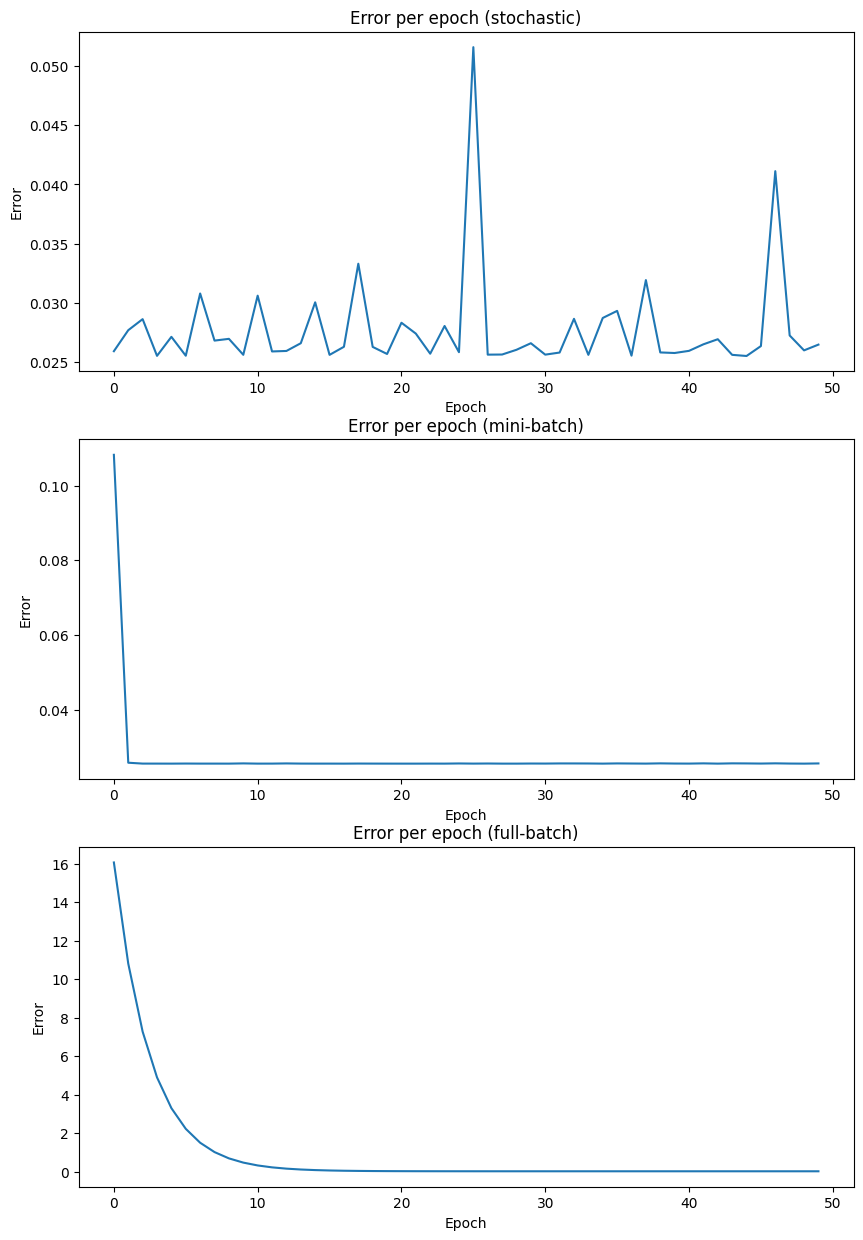

In [42]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

for idx, error in enumerate(errors):
  axs[idx].plot(error[list(error.keys())[0]])
  axs[idx].set_title(f'Error per epoch ({list(error.keys())[0]})')
  axs[idx].set_xlabel('Epoch')
  axs[idx].set_ylabel('Error')

In [32]:
# test_dataset = [
#     [[1, 0], [1]],
#     [[0, 0], [0]]
# ]

test_dataset = [[(X_test[i]), [y_test[i]]] for i in range(len(X_test))]

nn.predict(test_dataset)


> Predicting...
[#0] -> [0.26400949] (target: [0.6181818181818182])
[#1] -> [0.26400949] (target: [0.2727272727272727])
[#2] -> [0.26400949] (target: [0.3696969696969697])
[#3] -> [0.26400949] (target: [0.2787878787878788])
[#4] -> [0.26400949] (target: [0.48484848484848486])
[#5] -> [0.26400949] (target: [0.13636363636363635])
[#6] -> [0.26400949] (target: [0.20606060606060606])
[#7] -> [0.26400949] (target: [0.2909090909090909])
[#8] -> [0.26400949] (target: [0.18787878787878787])
[#9] -> [0.26400949] (target: [0.21212121212121213])
[#10] -> [0.26400949] (target: [0.46060606060606063])
[#11] -> [0.26400949] (target: [0.2545454545454545])
[#12] -> [0.26400949] (target: [0.16363636363636364])
[#13] -> [0.26400949] (target: [0.24242424242424243])
[#14] -> [0.26400949] (target: [0.24242424242424243])
[#15] -> [0.26400949] (target: [0.006060606060606061])
[#16] -> [0.26400949] (target: [0.2727272727272727])
[#17] -> [0.26400949] (target: [0.21212121212121213])
[#18] -> [0.26400949] (targ

In [43]:
errors = []

train_dataset = [[(X_train[i]), [y_train[i]]] for i in range(len(X_train))]

nn = NeuralNetwork(learning_rate=0.01, error_type='mae', debug=False)
nn.add(n_inputs=12, n_neurons=32, activation='sigmoid')
nn.add(n_inputs=32, n_neurons=16, activation='relu')
nn.add(n_inputs=16, n_neurons=8, activation='sigmoid')
nn.add(n_inputs=8, n_neurons=1, activation='linear')

print(nn)

nn.train(data=train_dataset, epochs=50, batch_size=1, print_error=True)
errors.append({'stochastic': nn.error_per_epoch})

Neural Network
Input Layer: 12 features
Layer 1: 32 neurons
Layer 2: 16 neurons
Layer 3: 8 neurons
Layer 4: 1 neurons

> Training...
Epoch 1/50 - Error: 0.16185878554522384
Epoch 2/50 - Error: 0.16185878554522387
Epoch 3/50 - Error: 0.13182061742549905
Epoch 4/50 - Error: 0.16185878554522387
Epoch 5/50 - Error: 0.16185878554522384
Epoch 6/50 - Error: 0.13182061742549905
Epoch 7/50 - Error: 0.13182061742549905
Epoch 8/50 - Error: 0.16185878554522387
Epoch 9/50 - Error: 0.13182061742549905
Epoch 10/50 - Error: 0.16185878554522387
Epoch 11/50 - Error: 0.16185878554522387
Epoch 12/50 - Error: 0.23702086839413697
Epoch 13/50 - Error: 0.16185878554522387
Epoch 14/50 - Error: 0.13182061742549905
Epoch 15/50 - Error: 0.13182061742549905
Epoch 16/50 - Error: 0.16185878554522387
Epoch 17/50 - Error: 0.16185878554522387
Epoch 18/50 - Error: 0.13182061742549903
Epoch 19/50 - Error: 0.16185878554522387
Epoch 20/50 - Error: 0.13182061742549905
Epoch 21/50 - Error: 0.16185878554522387
Epoch 22/50 - E

In [44]:
nn = NeuralNetwork(learning_rate=0.01, error_type='mae', debug=False)
nn.add(n_inputs=12, n_neurons=32, activation='sigmoid')
nn.add(n_inputs=32, n_neurons=16, activation='relu')
nn.add(n_inputs=16, n_neurons=8, activation='sigmoid')
nn.add(n_inputs=8, n_neurons=1, activation='linear')

print(nn)

nn.train(data=train_dataset, epochs=50, batch_size=32, print_error=True)
errors.append({'full-batch': nn.error_per_epoch})

Neural Network
Input Layer: 12 features
Layer 1: 32 neurons
Layer 2: 16 neurons
Layer 3: 8 neurons
Layer 4: 1 neurons

> Training...
Epoch 1/50 - Error: 1.8933213686121164
Epoch 2/50 - Error: 0.6673875115078298
Epoch 3/50 - Error: 0.12293997625652489
Epoch 4/50 - Error: 0.12187227050090729
Epoch 5/50 - Error: 0.12241641981488154
Epoch 6/50 - Error: 0.12373265147507942
Epoch 7/50 - Error: 0.12590382757918359
Epoch 8/50 - Error: 0.12199359715399932
Epoch 9/50 - Error: 0.12187227050090726
Epoch 10/50 - Error: 0.1243252121578495
Epoch 11/50 - Error: 0.12187246817020754
Epoch 12/50 - Error: 0.12231733748286658
Epoch 13/50 - Error: 0.12187246817020754
Epoch 14/50 - Error: 0.12202367765834429
Epoch 15/50 - Error: 0.12241641981488152
Epoch 16/50 - Error: 0.12358255549494344
Epoch 17/50 - Error: 0.12241641981488154
Epoch 18/50 - Error: 0.12202367765834429
Epoch 19/50 - Error: 0.12241641981488154
Epoch 20/50 - Error: 0.12187227050090726
Epoch 21/50 - Error: 0.12241641981488154
Epoch 22/50 - Erro

In [45]:
nn = NeuralNetwork(learning_rate=0.01, error_type='mae', debug=False)
nn.add(n_inputs=12, n_neurons=32, activation='sigmoid')
nn.add(n_inputs=32, n_neurons=16, activation='relu')
nn.add(n_inputs=16, n_neurons=8, activation='sigmoid')
nn.add(n_inputs=8, n_neurons=1, activation='linear')

print(nn)

nn.train(data=train_dataset, epochs=50, print_error=True)
errors.append({'full-batch': nn.error_per_epoch})

Neural Network
Input Layer: 12 features
Layer 1: 32 neurons
Layer 2: 16 neurons
Layer 3: 8 neurons
Layer 4: 1 neurons

> Training...
Epoch 1/50 - Error: 3.495949863365353
Epoch 2/50 - Error: 3.405949863365352
Epoch 3/50 - Error: 3.315949863365353
Epoch 4/50 - Error: 3.225949863365352
Epoch 5/50 - Error: 3.135949863365352
Epoch 6/50 - Error: 3.0459498633653523
Epoch 7/50 - Error: 2.9559498633653516
Epoch 8/50 - Error: 2.865949863365352
Epoch 9/50 - Error: 2.7759498633653514
Epoch 10/50 - Error: 2.685949863365352
Epoch 11/50 - Error: 2.5959498633653517
Epoch 12/50 - Error: 2.505949863365352
Epoch 13/50 - Error: 2.4159498633653516
Epoch 14/50 - Error: 2.325949863365352
Epoch 15/50 - Error: 2.235949863365352
Epoch 16/50 - Error: 2.1459498633653524
Epoch 17/50 - Error: 2.055949863365352
Epoch 18/50 - Error: 1.9659498633653514
Epoch 19/50 - Error: 1.8759498633653517
Epoch 20/50 - Error: 1.7859498633653517
Epoch 21/50 - Error: 1.6959498633653514
Epoch 22/50 - Error: 1.6059498633653513
Epoch 2

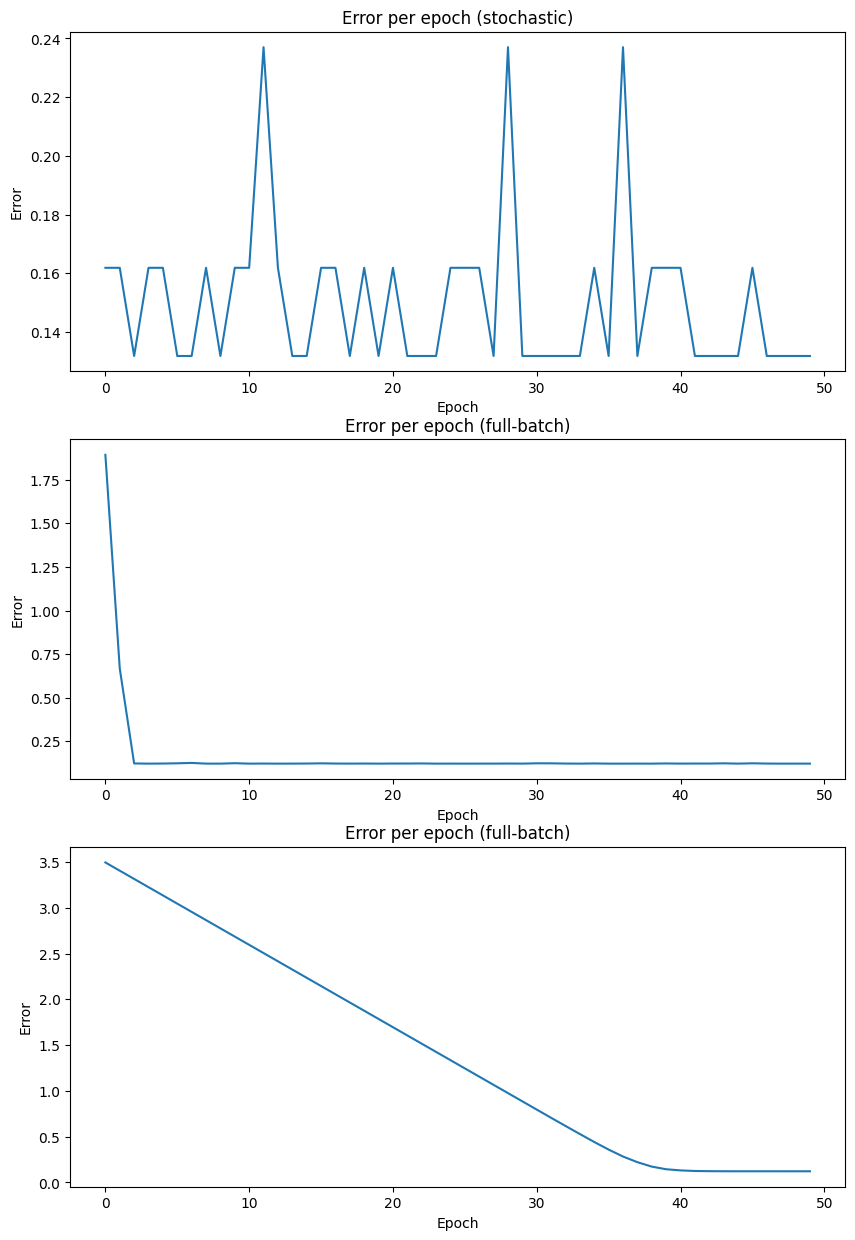

In [46]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

for idx, error in enumerate(errors):
  axs[idx].plot(error[list(error.keys())[0]])
  axs[idx].set_title(f'Error per epoch ({list(error.keys())[0]})')
  axs[idx].set_xlabel('Epoch')
  axs[idx].set_ylabel('Error')